In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import keras
from keras import layers

In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


In [ ]:
print(x_train.shape)  # (60000, 28, 28, 1)
print(x_test.shape)   # (10000, 28, 28, 1)

In [ ]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded) 

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

In [8]:
history = autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True,
                validation_data=(x_test, x_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 53s 888us/step - loss: 0.2802 - val_loss: 0.2823
Epoch 2/50
60000/60000 [==============================] - 56s 940us/step - loss: 0.2801 - val_loss: 0.2822
Epoch 3/50
60000/60000 [==============================] - 55s 921us/step - loss: 0.2800 - val_loss: 0.2822
Epoch 4/50
60000/60000 [==============================] - 52s 873us/step - loss: 0.2799 - val_loss: 0.2828
Epoch 5/50
60000/60000 [==============================] - 58s 970us/step - loss: 0.2799 - val_loss: 0.2822
Epoch 6/50
60000/60000 [==============================] - 52s 872us/step - loss: 0.2797 - val_loss: 0.2818
Epoch 7/50
60000/60000 [==============================] - 54s 901us/step - loss: 0.2797 - val_loss: 0.2818
Epoch 8/50
60000/60000 [==============================] - 59s 981us/step - loss: 0.2796 - val_loss: 0.2819
Epoch 9/50
60000/60000 [==============================] - 52s 870us/step - loss: 0.2795 - val_

In [9]:
decoded_imgs = autoencoder.predict(x_test)

First row is orignal images


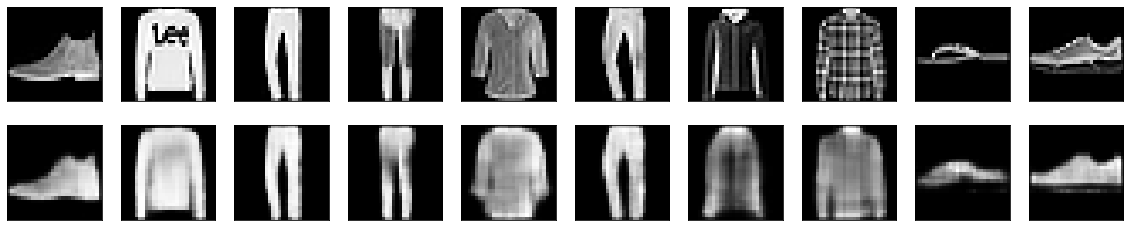

Second row is reconstrcuted images


In [10]:
import matplotlib.pyplot as plt

print('First row is orignal images')
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
print('Second row is reconstrcuted images')

Encoded representations


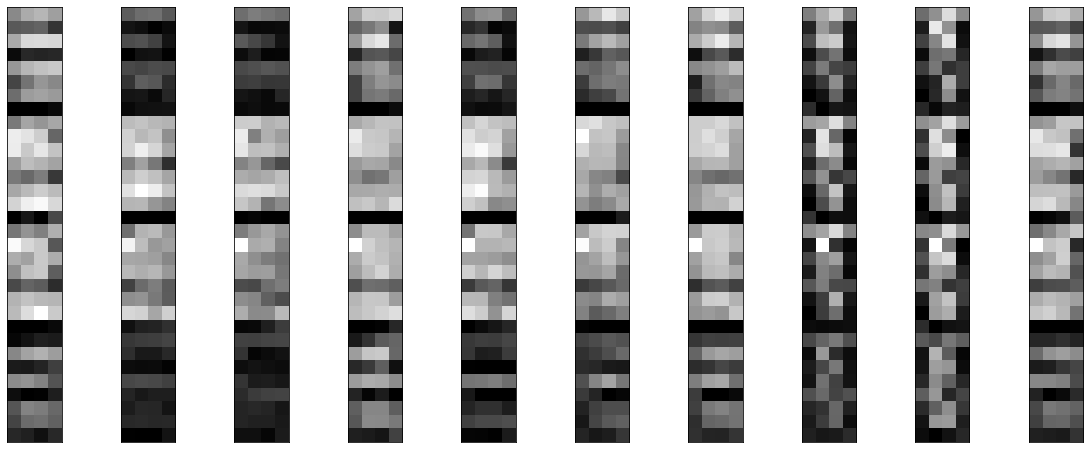

In [11]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

print('Encoded representations')
n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [12]:
loss = autoencoder.history['loss']
val_loss = autoencoder.history['val_loss']
epochs = range(50)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

TypeError: 'History' object is not subscriptable

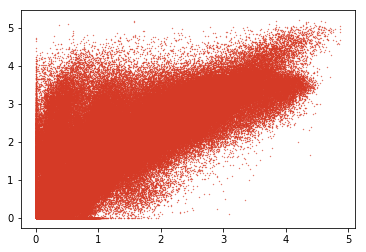

In [14]:
import matplotlib.pyplot as plt

# transform each input image into the latent space
z = encoder.predict(x_test)

# plot the latent space
plt.scatter(z[:,0], z[:,1], marker='o', s=0.1, c='#d53a26')
plt.show()